In [1]:
import pandas as pd

In [28]:
# dataset https://archive.ics.uci.edu/ml/datasets/Spambase

names = [
'word_freq_make'         ,
'word_freq_address'      ,
'word_freq_all'          ,
'word_freq_3d'           ,
'word_freq_our'          ,
'word_freq_over'         ,
'word_freq_remove'       ,
'word_freq_internet'     ,
'word_freq_order'        ,
'word_freq_mail'         ,
'word_freq_receive'      ,
'word_freq_will'         ,
'word_freq_people'       ,
'word_freq_report'       ,
'word_freq_addresses'    ,
'word_freq_free'         ,
'word_freq_business'     ,
'word_freq_email'        ,
'word_freq_you'          ,
'word_freq_credit'       ,
'word_freq_your'         ,
'word_freq_font'         ,
'word_freq_000'          ,
'word_freq_money'        ,
'word_freq_hp'           ,
'word_freq_hpl'          ,
'word_freq_george'       ,
'word_freq_650'          ,
'word_freq_lab'          ,
'word_freq_labs'         ,
'word_freq_telnet'       ,
'word_freq_857'          ,
'word_freq_data'         ,
'word_freq_415'          ,
'word_freq_85'           ,
'word_freq_technology'   ,
'word_freq_1999'         ,
'word_freq_parts'        ,
'word_freq_pm'           ,
'word_freq_direct'       ,
'word_freq_cs'           ,
'word_freq_meeting'      ,
'word_freq_original'     ,
'word_freq_project'      ,
'word_freq_re'           ,
'word_freq_edu'          ,
'word_freq_table'        ,
'word_freq_conference'   ,
'char_freq_comma'        ,
'char_freq_parantez'     ,
'char_freq_bracketh'     ,
'char_freq_esq'          ,
'char_freq_dolar'        ,
'char_freq_diez'         ,
'capital_run_length_average' ,
'capital_run_length_longest' ,
'capital_run_length_total',
'spam'
]

df = pd.read_csv("spambase.data",header=None,names=names)

In [29]:
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...   char_freq_comma  char_freq_parantez  \
0             0.00            0.00  ...              0.00               0.000   
1             0.00            0.94  ...              0.00               0.132   
2             0.64            0.25  ...              0.01               0.143   
3             0.31            0.63  ...              0.00               0.137   
4             0.31            0.63  ...              0.00               0.135   

   char_freq_bracketh  char_freq_esq  char_freq_dolar  char_freq_diez  \
0                 0.0          0.778            0.000           0.000   
1                 0.0          0.372            0.180           0.048   
2                 0.0          0.276            0.184           0.010   
3                 0.0          0.137            0.000           0.000   
4                 0.0          0.135            0.000           0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [30]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [31]:
df.shape

(4601, 58)

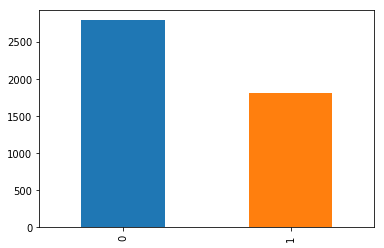

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

df.spam.value_counts().plot(kind="bar")

In [6]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [7]:
y  = df["spam"]

In [8]:
del df["spam"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2, stratify=y)

y = y.ravel()

In [10]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.as_matrix(),y_train.as_matrix())
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.as_matrix())

/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	43
Tentative: 	14
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	43
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	43
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	43
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	47
Tentative: 	7
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	47
Tentative: 	6
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	48
Tentative: 	5
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	49
Tentative: 	4
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5
Iteration: 	99 / 100
Confirmed: 	49
Tentative: 	3
Rejected: 	5


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	49
Tentative: 	1
Rejected: 	5


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [11]:
feature_df = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
feature_df ['rank']=feat_selector.ranking_

print (feature_df.head(feat_selector.n_features_))

                features  rank
0         word_freq_make     1
1      word_freq_address     1
2          word_freq_all     1
3           word_freq_3d     6
4          word_freq_our     1
5         word_freq_over     1
6       word_freq_remove     1
7     word_freq_internet     1
8        word_freq_order     1
9         word_freq_mail     1
10     word_freq_receive     1
11        word_freq_will     1
12      word_freq_people     3
13      word_freq_report     4
14   word_freq_addresses     1
15        word_freq_free     1
16    word_freq_business     1
17       word_freq_email     1
18         word_freq_you     1
19      word_freq_credit     1
20        word_freq_your     1
21        word_freq_font     4
22         word_freq_000     1
23       word_freq_money     1
24          word_freq_hp     1
25         word_freq_hpl     1
26      word_freq_george     1
27         word_freq_650     1
28         word_freq_lab     1
29        word_freq_labs     1
30      word_freq_telnet     1
31      

In [12]:
from sklearn.svm import SVC
svm=SVC(C=1.0,kernel='rbf',gamma=0.01) 

# if number of features is less than 1000 and observation between 10-10.000 we may use RBF Gaussian, 
# otherwise "linear kernel"

In [13]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
y_predi = svm.predict(X_train)
nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

0.922 

[[2117  174]
 [ 113 1276]] 

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2291
           1       0.88      0.92      0.90      1389

   micro avg       0.92      0.92      0.92      3680
   macro avg       0.91      0.92      0.92      3680
weighted avg       0.92      0.92      0.92      3680



In [16]:
y_predi=svm.predict(X_test)
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.835 

[[481  75]
 [ 77 288]] 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       556
           1       0.79      0.79      0.79       365

   micro avg       0.83      0.83      0.83       921
   macro avg       0.83      0.83      0.83       921
weighted avg       0.83      0.83      0.83       921



In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predi = lr.predict(X_train)

nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

y_predi = lr.predict(X_test)

nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.934 

[[2132  145]
 [  98 1305]] 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2277
           1       0.90      0.93      0.91      1403

   micro avg       0.93      0.93      0.93      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.93      0.93      0.93      3680

0.916 

[[529  48]
 [ 29 315]] 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       577
           1       0.87      0.92      0.89       344

   micro avg       0.92      0.92      0.92       921
   macro avg       0.91      0.92      0.91       921
weighted avg       0.92      0.92      0.92       921



/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_predi = classifier.predict(X_train)

nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

y_predi = classifier.predict(X_test)

nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.866 

[[2001  264]
 [ 229 1186]] 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2265
           1       0.82      0.84      0.83      1415

   micro avg       0.87      0.87      0.87      3680
   macro avg       0.86      0.86      0.86      3680
weighted avg       0.87      0.87      0.87      3680

0.8 

[[479 105]
 [ 79 258]] 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       584
           1       0.71      0.77      0.74       337

   micro avg       0.80      0.80      0.80       921
   macro avg       0.78      0.79      0.79       921
weighted avg       0.80      0.80      0.80       921



In [57]:
import pickle
filename = 'finalized_svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))